In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Veri Keşfi:

Online Retail UCI veri seti, e-ticaret şirketinin müşterilerinin satın aldıkları ürünleri bulunduran bir veri setidir. 2010-2011 yılları arasındaki satış verileri vardır.

InvoiceNo: Fatura numarası. Bu numara, her bir işlemi benzersiz bir şekilde tanımlar.

StockCode: Ürünün benzersiz kodu. Her ürünün bir tanımlayıcısı vardır.

Description: Ürünün açıklaması.

Quantity: Ürün adedinin miktarı.

InvoiceDate: İşlem tarihi ve saati.

UnitPrice: Ürün birim fiyatı (sterlin cinsinden).

CustomerID: Müşterinin benzersiz kimlik numarası.

Country: Müşterinin yaşadığı ülke.

In [27]:
import os
os.getcwd()


'/home/buluag/portfolio/data_analysis/online_retail_analysis'

In [28]:
import os
os.getcwd()


'/home/buluag/portfolio/data_analysis/online_retail_analysis'

In [29]:
data = pd.read_excel('Online Retail.xlsx')
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


veri setinde 541909 satır ve 8 özellik bulunmaktadır.

In [30]:
data.shape


(541909, 8)

info() çıktısına baktığımızda veri setinin toplamda 541,909 veri vardır. Bazı satırlarda eksik değerler oldugunu görüyoruz. Description sütununda 1,454, CustomerID sütununda 135,080 eksik değer bulunuyor. Özelliklerin veri tiplerini ve kolon isimlerini görebiliyoruz. Veri seti hafızada 33.1+ MB alan kullanıyor fazla bellek tüketen bir veri seti.

In [31]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


describe() ile veri setindeki sayısal veri tiplerinin ortalaması, standart sapması, kartilleri, maksimum ve minimum değerlerini, veri sayısını görebiliyoruz

In [32]:
data.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Bu veri setinde oldukça fazla veri kaybı vardır. Bu yüzden bu kayıplar uygun yöntemlerle doldurulmalı veya veri setinden kaldırılmalıdır.

Kayıp veride kullanabileceğimiz yöntemler:

1) Ortalama veya Medyan Değer ile Doldurma

2) En Çok Tekrarlanan Değer ile Doldurma

3) Makine Öğrenimi modelleri ile Doldurma

**CustomerID** sütunu için, veri setindeki eksik verilerin çok fazla olması nedeniyle makine öğrenimi modeli ile eksik verilerin doldurulması daha mantıklı görünmektedir. Ancak veri setinin büyük boyutu nedeniyle hem bilgisayarın işlem gücü hem de görselleştirmelerin okunaklılığı için eksik veri içeren satırlar veri setinden çıkarılmıştır. Ayrıca, analiz için bu sütunların boş olmaması önemlidir. Diğer çalışmaların da eksik değerleri çıkardığını gözlemlediğim bu yüzden bu yöntemi kullanmak gerektiğini daha da destekledim.


**Description** sütunu için ise eksik değerleri doldurmak analizi daha kapsamlı hale getirir. "Description" sütunu kategorik bir sütun olduğu için eksik değerleri en çok tekrar eden değerle (mod) doldurmak mantıklıdır.

In [33]:
data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [34]:
data = data[data['CustomerID'].notnull()]

data.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

CustomerID sütuundaki eksik değerleri kaldırdığımızda Description sütunundaki eksik değerlerde ortadan kalkmıştır. Yani Description için veri kaybı sorunu ortadan kalkmıştır. Ve veri setinin satır sayısı 406829' ye inmiştir.

In [35]:
data.shape


(406829, 8)

Aykırı değerleri ve veri setinin dağılımını görmek için Box Plot grafiği çizdirme:

<Axes: >

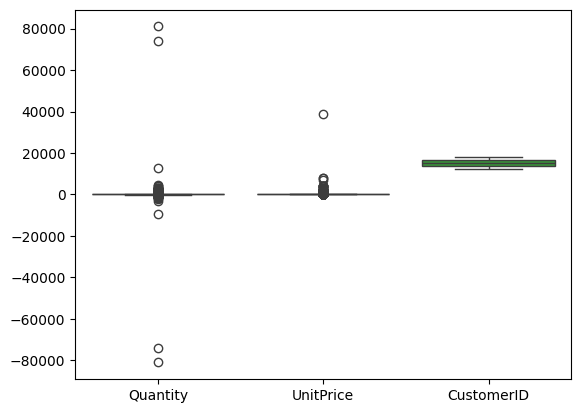

In [36]:
sns.boxplot(data=data)


Anormalliklerden bahsedecek olursak, bu veri setinde çok fazla aykırı değer görünüyor ve quantity, unitprice, customerID'nin rangeleri farklı oldugundan quantity, unitprice'ın ortalaması 0 gibi gözüküyor. Ve quantity(miktar) sütununda negatif değerler olması anormal bi durumdur.

Bu durumda, veri setindeki aykırı değerlerin gözlemlenmesi ve analiz edilmesi önemlidir. 

Birde quantity, unitprice'ın ayrı ayrı box plot grafiğine bakıp ortalamanın box plot grafiğinin değişip değişmediğine bakalım. çünkü rangeleri farklı oldugundan tek tek görselleştirildiğinde farklı bir görsel çıkabilir:

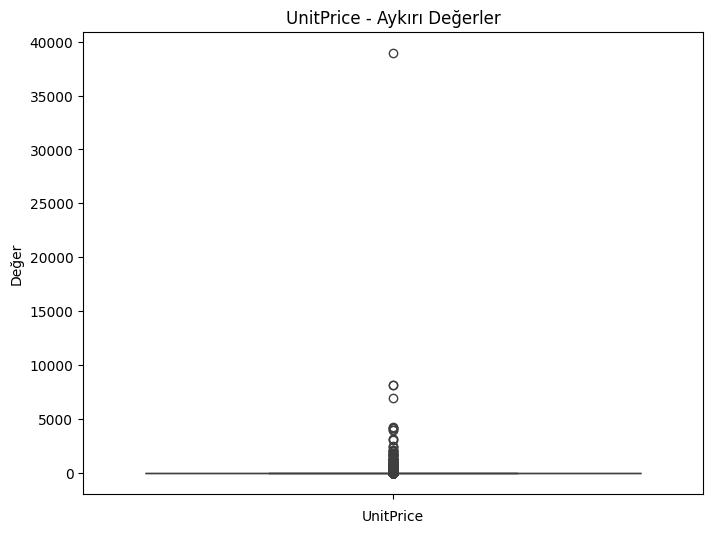

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['UnitPrice'])
plt.title('UnitPrice - Aykırı Değerler')
plt.xlabel('UnitPrice')
plt.ylabel('Değer')
plt.show()


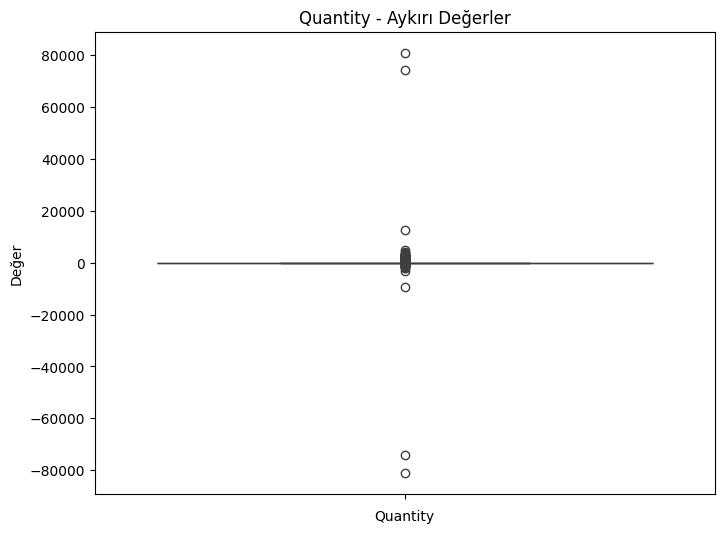

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Quantity'])
plt.title('Quantity - Aykırı Değerler')
plt.xlabel('Quantity')
plt.ylabel('Değer')
plt.show()


Ayrı ayrı görselleştirmede de aynı sonucu verdi.

Negatif quantityleri veri setinden atalım ve unitprice'da 10000'den yüksek değerleride veri setinden atalım:

In [39]:
data = data[data['Quantity'] >= 0]
data = data[data['UnitPrice'] <= 10000]

data.shape


(397924, 8)

"UnitPrice" ve "Quantity" sütunlarındaki aykırı değerleri filtrelemek için eşik değerlere göre (%95 eşik değeri) "UnitPrice" ve "Quantity" sütunlarının aykırı değerlerini belirlirleyelim. Daha sonra, bu eşik değerlerini kullanarak veri setini filtreliyelim. Filtreleme işlemi, "UnitPrice" sütunundaki değerleri eşik değerinden küçük veya eşit olan ve "Quantity" sütunundaki değerleri eşik değerinden küçük veya eşit olan satırları içeren bir filtrelenmiş veri seti oluşturur.

In [40]:
# Aykırı değerlerin eşik değerlerini belirleme
unitprice_threshold = data['UnitPrice'].quantile(0.95)  # %95 eşik değeri
quantity_threshold = data['Quantity'].quantile(0.95)  # %95 eşik değeri

# Aykırı değerleri filtreleme
filtered_data = data[(data['UnitPrice'] <= unitprice_threshold) & (data['Quantity'] <= quantity_threshold)]

# Filtrelenmiş veri setinin boyutunu kontrol etme
print("Filtrelenmiş Veri Seti Boyutu:", filtered_data.shape)



Filtrelenmiş Veri Seti Boyutu: (361179, 8)


In [41]:
data = data.drop('Description', axis=1)


In [42]:
data.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)


CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
          ... 
13663.0      1
15543.0      1
15551.0      1
13690.0      1
15567.0      1
Name: InvoiceNo, Length: 4339, dtype: int64

Yukarıdaki kodla her müşterinin kaç farklı sipariş verdiğini (InvoiceNo'nun benzersiz değerlerini) hesapladık. Bu, müşterinin işlem sıklığını yansıtabilir ve müşterileri farklı segmentlere ayırmak için kullanılabilir.

In [43]:
# Her siparişte her müşteri için ortalama benzersiz ürün sayısı.
mean_of_unique_items = round(data.groupby(['CustomerID',
                                           'InvoiceNo']).agg({'StockCode': lambda x: x.nunique()}).groupby('CustomerID')['StockCode'].mean(),
                             1).sort_values(ascending=False)
mean_of_unique_items


CustomerID
14096.0    298.8
12378.0    219.0
16984.0    191.0
12688.0    171.0
15464.0    155.0
           ...  
17029.0      1.0
18268.0      1.0
18273.0      1.0
18233.0      1.0
12346.0      1.0
Name: StockCode, Length: 4339, dtype: float64

Yukarıdaki kodda ise müşterilerin her siparişte ortalama olarak kaç farklı ürün aldığını hesapladık. Bu, müşterilerin alışveriş tercihlerini ve ürün çeşitliliğiyle ilgili davranışlarını yansıtabilir. Müşteriler arasında ürün çeşitliliği açısından farklılıklar olduğunu gösterir ve segmentasyon için önemli bir özelliktir

#### Normalizasyon

Standart Scaler sadece numerik verilere uygulanır. Standart Scaler, verileri her bir özelliğin ortalama değerinden çıkartarak, standart sapmaya böler. Bu işlem sadece numerik değerler üzerinde gerçekleştirilebilir, çünkü ortalama değer ve standart sapma, sayısal verilerin istatistiksel özelliklerini hesaplamayı gerektirir. Eğer veri setinde numerik olmayan kategorik veya metin veriler varsa, Standart Scaler kullanılamaz. Bu tür veriler için One-Hot Encoding veya Label Encoding dönüşümleri uygulanabilir.

In [44]:
from sklearn.preprocessing import StandardScaler

# Özellikleri seçme
features = ['Quantity', 'UnitPrice']

# Özellikleri normalizasyon için kopyalama
normalized_data = data[features].copy()

# Standartizasyon (Z-score Normalizasyonu)
scaler = StandardScaler()
normalized_data[features] = scaler.fit_transform(normalized_data)

# Normalizasyon yapılmış verinin ilk 5 satırını görüntüleme
print(normalized_data.head())


   Quantity  UnitPrice
0 -0.038919  -0.025623
1 -0.038919   0.012392
2 -0.027834  -0.016571
3 -0.038919   0.012392
4 -0.038919   0.012392


* Label Encoding: Bu yöntem, kategorik değişkenlerin sıralama veya öncelik durumları olduğu durumlarda tercih edilebilir. Örneğin, "düşük", "orta", "yüksek" gibi bir ölçeğe sahip kategori değerleri için kullanılabilir. Label Encoding, kategorileri farklı sayısal değerlere dönüştürerek sıralama bilgisini korur.

* One-Hot Encoding: Bu yöntem, kategorik değişkenlerin sıralama veya öncelik durumları olmadığı ve kategorilerin birbirinden bağımsız olduğu durumlarda kullanılabilir. Örneğin, ürün kategorileri, ülke adları gibi durumlarda kullanılabilir. One-Hot Encoding, her kategoriye ait bir sütun oluşturarak binary (ikili) öznitelikler elde eder.

Numerik olmayan kategorik veya metin veriler için One-Hot Encoding tercih edebiliriz. Çünkü müşteriler farklı özelliklere sahiptir ve bu özellikleri birbirinden bağımsızdır. Örneğin, ürün kategorileri, coğrafi konum gibi kategorik değişkenler One-Hot Encoding ile dönüştürülebilir. Bu şekilde her kategori için ayrı bir sütun oluşturulur ve müşterilerin bu kategorilere ait olup olmadığı binary(ikili) değerlerle ifade edilir.

Fakat one-hot encoding gibi yöntemlerle bu sütunlara uygulanan dönüşümler veri setinin boyutunu önemli ölçüde artırabilir. Veri setinizdeki her bir benzersiz değer için yeni bir sütun oluşturur bu yüzden veri setindeki benzersiz değerlerin sayısını kontrol etmeliyiz ve veri setini büyütecek değerleri dikkatlice düşünüp veri setinden atabiliriz. 

In [45]:
unique_stockcodes = data["StockCode"].nunique()
unique_invoicenos = data["InvoiceNo"].nunique()
unique_invoicedates = data["InvoiceDate"].nunique()
unique_customerids = data["CustomerID"].nunique()
unique_countries = data["Country"].nunique()

print("StockCode unique değer sayısı:", unique_stockcodes)
print("InvoiceNo unique değer sayısı:", unique_invoicenos)
print("InvoiceDate unique değer sayısı:", unique_invoicedates)
print("CustomerID unique değer sayısı:", unique_customerids)
print("Country unique değer sayısı:", unique_countries)


StockCode unique değer sayısı: 3665
InvoiceNo unique değer sayısı: 18536
InvoiceDate unique değer sayısı: 17286
CustomerID unique değer sayısı: 4339
Country unique değer sayısı: 37


Sırasıyla değerlendirelim:

InvoiceNo: 

StockCode: 

InvoiceDate: InvoiceDate sütununu kaldırmak istedim

In [46]:
data = data.drop('InvoiceDate', axis=1)


In [47]:
from sklearn.preprocessing import LabelEncoder

# CustomerID için label encoding
customer_encoder = LabelEncoder()
data["CustomerID"] = customer_encoder.fit_transform(data["CustomerID"])

# Country için label encoding
country_encoder = LabelEncoder()
data["Country"] = country_encoder.fit_transform(data["Country"])

# StockCode için label encoding
stockcode_encoder = LabelEncoder()
data["StockCode"] = data["StockCode"].astype(str)
data["StockCode"] = stockcode_encoder.fit_transform(data["StockCode"])


data.head()


,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
0,536365,3233,6,2.55,4017,35
1,536365,2643,6,3.39,4017,35
2,536365,2847,8,2.75,4017,35
3,536365,2795,6,3.39,4017,35
4,536365,2794,6,3.39,4017,35


In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Müşteri özelliklerini hesaplayın
customer_data = data.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",
    "UnitPrice": ["min", "max", "mean"],
    "Country": "first",
    "Quantity": ["min", "max", "mean"]
})
customer_data.columns = ["count_invoiceNo", "min_unitprice", "max_unitprice", "avg_unitprice",
                         "country", "min_quality", "max_quality", "avg_quality"]

# NaN değerleri doldurun
customer_data.fillna(0, inplace=True)

# Özellikleri normalize edin
features = ["count_invoiceNo", "min_unitprice", "max_unitprice", "avg_unitprice",
            "min_quality", "max_quality", "avg_quality"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[features])

# Normalize edilmiş özellikleri kullanarak DataFrame oluşturun
normalized_data = pd.DataFrame(scaled_features, columns=features)

# Müşteri segmentasyonunu görüntüleyin
print(normalized_data.head())


   count_invoiceNo  min_unitprice  max_unitprice  avg_unitprice  min_quality  \
0        -0.424675      -0.012253      -0.140524      -0.100144    64.767736   
1         0.354080      -0.036313      -0.074800      -0.053248    -0.022344   
2        -0.035297      -0.035094       0.078146       0.037996    -0.023217   
3        -0.424675      -0.031135       1.537440       0.111796    -0.023217   
4        -0.424675      -0.018039       0.078146      -0.018246    -0.023217   

   max_quality  avg_quality  
0    43.820392    60.891575  
1     0.070136    -0.028273  
2     0.013360     0.022638  
3    -0.050514    -0.032264  
4    -0.057611    -0.029847  


## PCA

PCA'nın n_components parametresini değiştirerek farklı bileşen sayılarını denemeliyiz. İlk önce 7 özelliği denemekle başlayıp %80 varyans açıklama oranına yaklaşıncaya kadar n_components parametresini düşüreceğim:

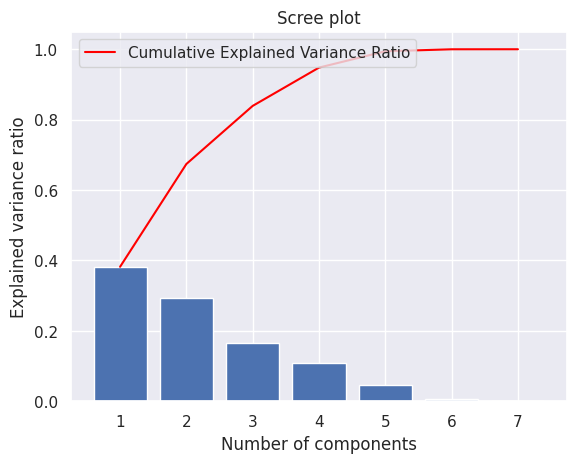

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
sns.set()

# PCA ile 7 özelliği deneyelim
pca = PCA(n_components=7)

# Veri setini fit ve transform edelim
reduced_features = pca.fit_transform(normalized_data)

# Açıklanan varyans oranlarını elde edelim
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Scree plot grafiğini çizdirelim
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance,
         c='red', label='Cumulative Explained Variance Ratio')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.show()


In [50]:
# Varyans açıklama oranlarını elde et
explained_variance_ratio = pca.explained_variance_ratio_

# Her bir bileşenin varyans açıklama oranını görüntüle
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")


PC1: 0.3820
PC2: 0.2921
PC3: 0.1651
PC4: 0.1088
PC5: 0.0463
PC6: 0.0057
PC7: 0.0001


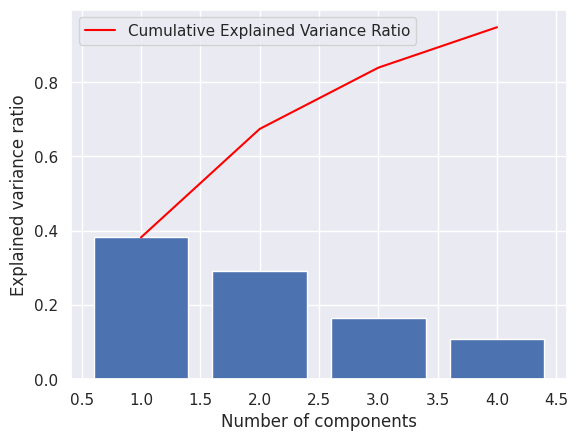

In [51]:
sns.set()

# PCA ile 4 özelliği deneyelim
pca = PCA(n_components=4)

# Veri setini fit ve transform edelim
reduced_features = pca.fit_transform(normalized_data)

# Açıklanan varyans oranlarını elde edelim
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Scree plot grafiğini çizdirelim
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance,
         c='red', label='Cumulative Explained Variance Ratio')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()
plt.show()


In [52]:
# Varyans açıklama oranlarını elde et
explained_variance_ratio = pca.explained_variance_ratio_

# Her bir bileşenin varyans açıklama oranını görüntüle
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")


PC1: 0.3820
PC2: 0.2921
PC3: 0.1651
PC4: 0.1088


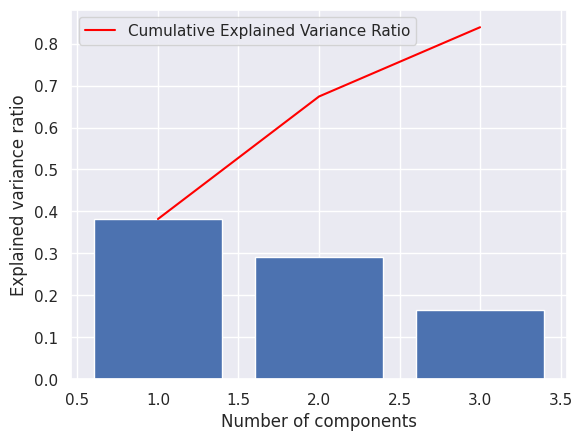

In [53]:
sns.set()

# PCA ile 3 özelliği deneyelim
pca = PCA(n_components=3)

reduced_features = pca.fit_transform(normalized_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance,
         c='red', label='Cumulative Explained Variance Ratio')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()
plt.show()


In [54]:
# Varyans açıklama oranlarını elde et
explained_variance_ratio = pca.explained_variance_ratio_

# Her bir bileşenin varyans açıklama oranını görüntüle
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")


PC1: 0.3820
PC2: 0.2921
PC3: 0.1651


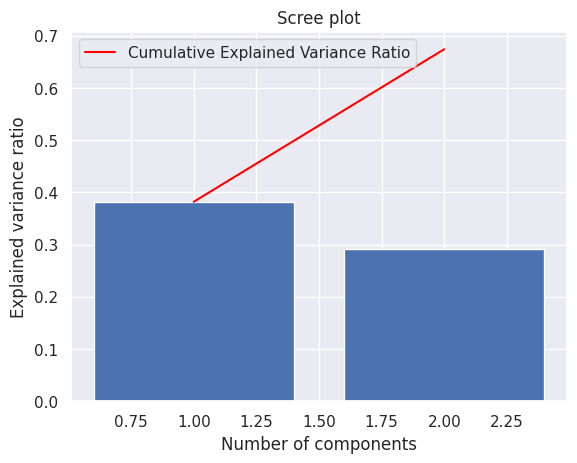

In [55]:
sns.set()

# PCA ile 2 özelliği deneyelim
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_data)

plt.bar(
    range(1, len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
)

plt.plot(
    range(1, len(pca.explained_variance_ratio_)+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance Ratio')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')

plt.show()


In [56]:
# Varyans açıklama oranlarını elde et
explained_variance_ratio = pca.explained_variance_ratio_

# Her bir bileşenin varyans açıklama oranını görüntüle
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")


PC1: 0.3820
PC2: 0.2921


Görüldüğü üzere n_components parametresini 2 yaptığımızda varyans açıklama oranı %80'ın çok altında kaldı (0.3820+0.2921=0.6741). Bu yüzden bu veri seti için ideal bileşen sayısı 3 olmalıdır.

Tekrardan n_components parametresini 3 olarak ayarlayıp kodu tekrar çalıştıralım:


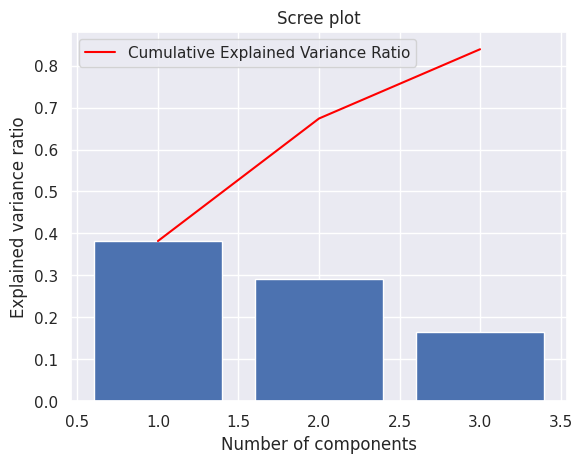

                      PC1       PC2       PC3
feature_names                                
count_invoiceNo  0.003814  0.036261  0.776177
min_unitprice    0.001284  0.674148 -0.160849
max_unitprice    0.006177  0.279892  0.595153
avg_unitprice    0.002772  0.682516 -0.126704
min_quality      0.566921 -0.005393 -0.022140
max_quality      0.552605  0.000876  0.027057
avg_quality      0.610873 -0.003358 -0.013880


In [57]:
sns.set()

# PCA ile 3 özelliği deneyelim
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(normalized_data)

# explained_variance_ratio plot grafiği çizdirme
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(
    pca.explained_variance_ratio_), c='red', label='Cumulative Explained Variance Ratio')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.show()

# Temel bileşenlerin korelasyon katsayıları
loadings = pca.components_

# PCA öncesi öznitelik sayısı
n_features = pca.n_features_in_

# PCA öncesi öznitelik isimleri
feature_names = ['count_invoiceNo', 'min_unitprice', 'max_unitprice',
                 'avg_unitprice', 'min_quality', 'max_quality', 'avg_quality']

# Temel bileşen isimleri
pc_list = [f'PC{i}' for i in range(1, n_features + 1)]

# Temel bileşen isimlerini yükleme değerleriyle eşleştirme
pc_loadings = dict(zip(pc_list, loadings))

# Öznitelik isimleri ile temel bileşenler arasındaki korelasyon katsayıları matrisi
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')

# Sonuçları görüntüleme
print(loadings_df)


In [58]:
print(pca.explained_variance_ratio_)


[0.3819688 0.2920503 0.1650729]


varyans açıklama oranı ve öznitelik isimleri ile temel bileşenler arasındaki korelasyon katsayıları matrisine göre hangi özellik kombinasyonları ile kümeleme analizi yapacağımıza karar verelim.

**ilk kombinasyon:** "avg_quality" ( PC1 bileşeninde en yüksek ağırlığa sahip özelliktir.),  "avg_unitprice" (PC2 bileşeninde önemli ağırlıklara sahiptir.), "count_invoiceNo" PC3 bileşeni için en yüksek ağırlığa sahip özelliktir. 

**ikinci kombinasyon:** avg_unitprice, max_quality, count_invoiceNo

## 3. Kümeleme


Müşteri segmentasyonu için önemli olabilecek özellikler:

işlem sıklığı: müşterilerin belirli bir zaman diliminde ne kadar alışveriş yaptığını anlamak için önemli olabilir. Bu bize müşterinin satın alma alışkanlığı hakkında bilgi verir. 

Parasal Değer: Müşteriler alışverişlerinde ne kadar para harcıyorlar bunu bilmek de müşterinin satın alma ve harcama alışkanlığını analiz etmek açısından önemlidir.

Ürün Kategorileri: Bazı müşteriler belirli kategorideki ürünleri almaya daha meyilli olurlar. Bazı müşteriler ise daha çeşitli ürün satın alma eğiliminde olurlar.

Benzersiz Ürün Sayısı: müşterilerin farklı ürünlerden kaç tanesini satın aldığı da müşteri segmentasyonu analizi için önemli olabilir.

Müşterinin yaşadığı ülke: müşterilerin en çok ve en az hangi şehirlerden alışveriş yaptığı da önemli olabilir. E ticaret şirketinin hangi ülkelerdeki reklam harcamalarını ne kadar arttıracağı ve azaltacağı açısından önemli bir özellik olabilir.

In [59]:
from sklearn.cluster import (KMeans, MiniBatchKMeans, AffinityPropagation,
                             MeanShift, SpectralClustering,
                             AgglomerativeClustering, DBSCAN,
                             OPTICS, Birch)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (calinski_harabasz_score, davies_bouldin_score,
                             silhouette_score)
import numpy as np


# Özellik kombinasyonları
combinations = [
    ["avg_quality", "avg_unitprice", "count_invoiceNo"],
    ["avg_unitprice", "max_quality", "count_invoiceNo"],
]


# Kümeleme algoritmaları ve hiperparametreleri
algorithms = [
    (KMeans, {'n_clusters': range(2, 5)}),
    (MiniBatchKMeans, {'n_clusters': range(2, 5)}),
    (AffinityPropagation, {'damping': np.linspace(0.5, 1.0, num=5)}),
    (MeanShift, {'bandwidth': np.linspace(0.1, 1.0, num=5)}),
    (SpectralClustering, {'n_clusters': range(2, 5)}),
    (AgglomerativeClustering, {'n_clusters': range(2, 5)}),
    (DBSCAN, {'eps': np.linspace(0.1, 1.0, num=5), 'min_samples': range(2, 5)}),
    (OPTICS, {'min_samples': range(2, 5)}),
    (Birch, {'threshold': np.linspace(0.1, 1.0, num=5)}),
    (GaussianMixture, {'n_components': range(2, 5)})
]

# Tüm kombinasyonları kontrol etmek için döngü oluşturma
for combination in combinations:
    X_comb = normalized_data[combination]
    print("Combination:", combination)

    # Her bir kombinasyon için kümeleme algoritmalarını uygulama
    for algorithm, params in algorithms:
        print("Algorithm:", algorithm.__name__)
        for param_name, param_values in params.items():
            if isinstance(param_values, int):
                param_values = [param_values]
            for param_value in param_values:
                if algorithm == AffinityPropagation and param_name == 'damping' and param_value == 1.0:
                    continue  # AffinityPropagation için damping=1.0 kombinasyonunu atla
                algorithm_instance = algorithm(**{param_name: param_value})
                labels = algorithm_instance.fit_predict(X_comb)

                # Küme sayısını ve parametreleri yazdırma
                params = {param_name: param_value}
                if 'n_clusters' in params:
                    params['n_clusters'] = labels.max() + 1
                print("  Params:", params)

                # Kümeleme sonuçlarını değerlendirme
                silhouette = silhouette_score(X_comb, labels)
                calinski = calinski_harabasz_score(X_comb, labels)
                davies_bouldin = davies_bouldin_score(X_comb, labels)
                print("  Silhouette Score:", silhouette)
                print("  Calinski-Harabasz Index:", calinski)
                print("  Davies-Bouldin Score:", davies_bouldin)
                print("---")


Combination: ['avg_quality', 'avg_unitprice', 'count_invoiceNo']
Algorithm: KMeans
  Params: {'n_clusters': np.int32(2)}


  Silhouette Score: 0.9878914088045023
  Calinski-Harabasz Index: 1606.7184330414782
  Davies-Bouldin Score: 0.008490680093729228
---
  Params: {'n_clusters': np.int32(3)}
  Silhouette Score: 0.9880005506448313
  Calinski-Harabasz Index: 2706.580584485143
  Davies-Bouldin Score: 0.008163825760176867
---
  Params: {'n_clusters': np.int32(4)}
  Silhouette Score: 0.8860398260731508
  Calinski-Harabasz Index: 3520.804987732851
  Davies-Bouldin Score: 0.304526529560625
---
Algorithm: MiniBatchKMeans
  Params: {'n_clusters': np.int32(2)}
  Silhouette Score: 0.6576090997476304
  Calinski-Harabasz Index: 486.1358422621557
  Davies-Bouldin Score: 0.9605573539461226
---
  Params: {'n_clusters': np.int32(3)}
  Silhouette Score: 0.6919012412201088
  Calinski-Harabasz Index: 398.9947080701498
  Davies-Bouldin Score: 1.479771797514266
---
  Params: {'n_clusters': np.int32(4)}
  Silhouette Score: 0.480937452208694
  Calinski-Harabasz Index: 333.2124160849293
  Davies-Bouldin Score: 1.296232147852809


/home/buluag/portfolio/env/lib64/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


  Params: {'damping': np.float64(0.5)}
  Silhouette Score: 0.20720271432512885
  Calinski-Harabasz Index: 3364.7711894115932
  Davies-Bouldin Score: 0.3575448204584092
---


Yukarıdaki sonuçlara göre:

İlk olarak, 'avg_quality', 'avg_unitprice' ve 'count_invoiceNo' değişkenlerinin birleşimini kullanan birçok algoritmanın aynı sonuçları verdiğini görebiliriz. Bu sonuçlara dayanarak, KMeans ve AgglomerativeClustering algoritmalarının en yüksek Silhouette skorlarına ve Calinski-Harabasz indekslerine sahip olduğunu görüyoruz. Bu durum, bu iki algoritmanın verileri iyi bir şekilde kümelendirdiğini ve küme içi benzerliklerin küme dışı benzerliklere göre daha yüksek olduğunu göstermektedir. Davies-Bouldin skoru da düşük olduğundan, kümeleme sonuçları daha tutarlı ve homojen olabilir.

Ancak, DBSCAN ve OPTICS algoritmalarının Silhouette skorları ve Calinski-Harabasz indeksleri daha düşük olduğu ve Davies-Bouldin skorlarının daha yüksek olduğu görülmektedir. Bu durum, bu algoritmaların verileri daha az başarılı bir şekilde kümelendirdiğini veya daha fazla gürültüye sahip olduğunu gösterebilir.

Bir sonraki kombinasyon olan 'avg_unitprice', 'max_quality' ve 'count_invoiceNo' için ise KMeans, AgglomerativeClustering ve SpectralClustering algoritmalarının en iyi performansı gösterdiği görülüyor. Bu algoritmalar, yüksek Silhouette skorları ve Calinski-Harabasz indeksleri ile verileri başarılı bir şekilde kümelendirdiğini gösterirken, düşük Davies-Bouldin skorları homojen kümeler oluşturduğunu göstermektedir.

Sonuç olarak, her iki kombinasyon için de KMeans, AgglomerativeClustering ve SpectralClustering algoritmalarının en iyi performansı gösterdiği söylenebilir. Bu algoritmalar, verileri iyi bir şekilde kümelendirebilir, homojen kümeler oluşturabilir ve küme içi benzerlikleri küme dışı benzerliklere göre daha yüksek tutabilir.

/home/buluag/gh/python_projects/work_env/lib64/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/buluag/gh/python_projects/work_env/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(


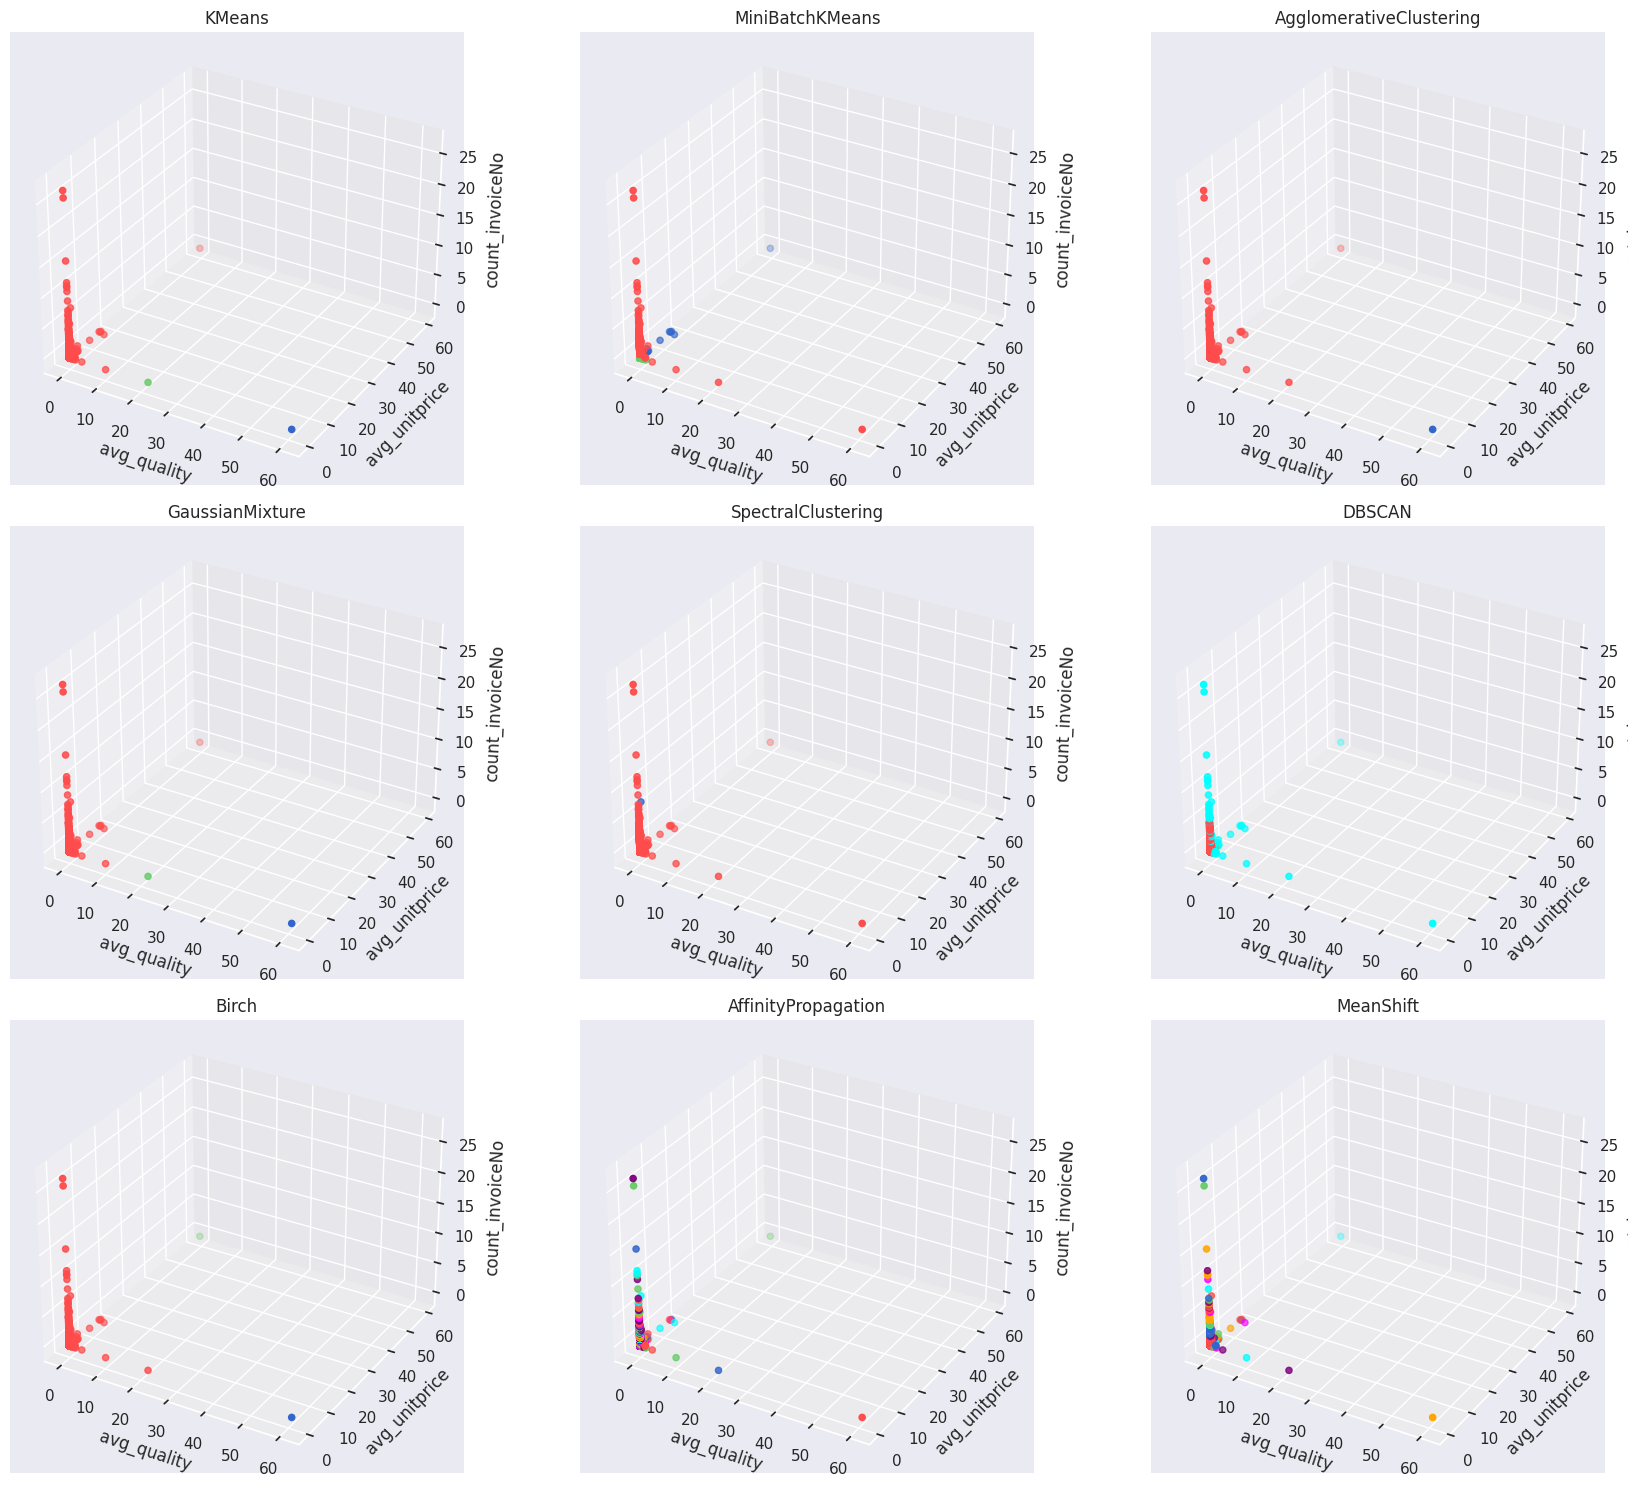

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, Birch, AffinityPropagation, MeanShift
import pandas as pd
from sklearn.mixture import GaussianMixture

# Kümeleme algoritmalarını tanımlama
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
mbkmeans = MiniBatchKMeans(n_clusters=3, random_state=42, n_init='auto')
agg = AgglomerativeClustering(n_clusters=2)
gmm = GaussianMixture(n_components=3, random_state=42)
spectral = SpectralClustering(n_clusters=3, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)
birch = Birch(n_clusters=3)
affprop = AffinityPropagation(damping=0.5, random_state=0)
meanshift = MeanShift()

# Algoritmaları bir liste olarak tutma
algorithms = [kmeans, mbkmeans, agg, gmm, spectral, dbscan, birch, affprop, meanshift]

# Renk paleti
colors = ['#FF4C4C', '#3366CC', '#66CC66', '#FFA500', '#800080', '#FF00FF', '#00FFFF']

# 3D figure oluştur
fig = plt.figure(figsize=(18, 15))

# Her bir kümeleme algoritması için görselleştirme yapma
for i, algorithm in enumerate(algorithms):
    # 3D alt grafiği oluştur
    ax = fig.add_subplot(3, 3, i+1, projection='3d')

    # Kümeleme algoritmasını uygula ve etiketleri elde etme
    labels = algorithm.fit_predict(normalized_data.values)

    # Veri noktalarının renklerini belirleme
    point_colors = [colors[label % len(colors)] for label in labels]

    # Noktaları 3D olarak görselleştirme
    ax.scatter(normalized_data['avg_quality'], normalized_data['avg_unitprice'], normalized_data['count_invoiceNo'], c=point_colors)

    # Eksen etiketlerini ayarlama
    ax.set_xlabel('avg_quality')
    ax.set_ylabel('avg_unitprice')
    ax.set_zlabel('count_invoiceNo')

    # Algoritmanın adını ekleme
    ax.set_title(algorithm.__class__.__name__)

# Grafikleri düzenle
plt.tight_layout()

# Göster
plt.show()



kırmızı kümeledeki müşteriler düşük ortalama kalitede ve düşük ortalama birim fiyatlı ürünleri satın almaktadır ve "count_invoiceNo" özelliği, müşterilerin toplam satın alma işlemi sayısını temsil eder. Bu değerin düşük veya yüksek olması, müşterilerin satın aldıkları ürünlerin çeşitliği veya tekrarlanan satın almalarını gösterir. kırmızı kümedeki müşterilerin çok azı tekrarlayan satın alma alışkanlığı vardır genelde aldıkları ürünler çeşitlidir. yeşil ve mavi renkli noktacık ise farklı davranış gösteren müşterilerdir. mavi renkli kümedekiler yüksek ortalama kalitede ve düşük ortalama birim fiyatlı alışveriş yapan müşterilerdir.  yeşil renkteki kümedeki müşteriler ise ortalama orta kalitede alışveriş yapan müşterilerdir. Örneğin kırmızı renkli kümedeki müşterilere sıklıkla alışveriş yapmaları için teşvik edici programlar veya indirimler sunabiliriz. Yeşil ve mavi kümedeki müşteriler için yüksek kaliteli ürünleri vurgulayarak müşteri memnuniyetini artırabiliriz.

MiniBatch K-Means algoritmasına göre müşterilerin düşük ortalama kalitedeki ve düşük birim fiyatlı ürünleri tercih ettiği görülmektedir. Düşük "count_invoiceNo" bir müşterinin düşük "count_invoiceNo" değerine sahip olması, genellikle daha az sayıda farklı ürün satın aldığı anlamına geliyor yüksek olması ise daha fazla sayıda farklı ürün satın aldığı anlamına geliyor. Mavi renkli küme, düşük ortalama kalitede ve düşük birim fiyatlı ürünleri satın alan müşterileri temsil eder ve sayıları oldukça azdır. Yeşil renkli noktacıklar ise düşük ortalama kalitede ve düşük birim fiyatlı ürünleri tercih eden diğer müşterileri ifade eder.

Agglomerative clustering, Gausiann Mixture ve Birch algoritmalarına göre kırmızı renkli küme k means ile benzer özellikler taşır. Mavi renkli küme de yine k means ile benzerlikler taşır. Sonuçlar aynı çıkmıştır.


Spectral clustering algoritmasına göre kırmızı renkli kümede düşük ortalama kalitede ve düşük birim fiyatlı müşteriler bulunmaktadır. Müşterilerin çoğu düşük "count_invoiceNo" değerine sahip yani genellikle daha az sayıda farklı ürün satın alıyor. Daha azı ise yüksek  "count_invoiceNo" değerine sahip yani genellikle daha fazla sayıda farklı ürün satın alıyorlar.

DBSCAN algoritmasına göre düşük ortalama kalitede ve düşük ortalama birim fiyatlı ürünler satın alıyor müşteriler ve az sayıda farklı ürün satın alıyorlar. Kırmızı renkli küme düşük ortalama kalitede ve düşük ortalama birim fiyatlı ürünler satın alıyor.

AffinityPropagation ve MeanShift algoritmalarına göre ise kümeler birbirinden net olarak ayrışmadığı için bir yorum yapmak imkansızdır. Sonuçlar kötü çıkmıştır. 

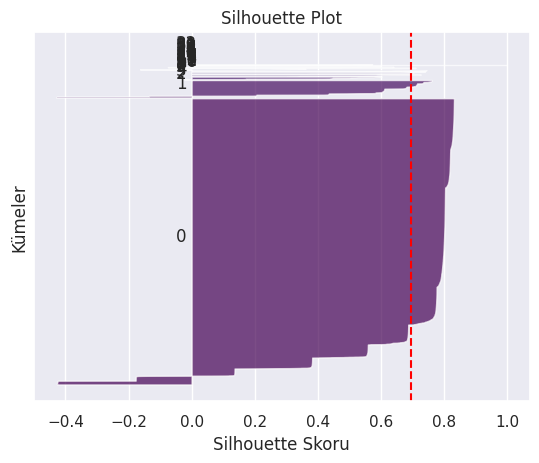

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

X_subset = normalized_data[["avg_quality", "avg_unitprice", "count_invoiceNo"]].values

# Kümeleme sonuçları ve veri seti üzerinde çalışıyoruz
cluster_labels = algorithm.fit_predict(X_subset)  # X_subset, veri setindeki seçtiğiniz kombinasyonlar olan sütunları içerir

# Silhouette skorunu hesapla
silhouette_avg = silhouette_score(X_subset, cluster_labels)

# Her bir veri noktasının silhouette skorunu hesapla
sample_silhouette_values = silhouette_samples(X_subset, cluster_labels)

# Silhouette Plot çizimi
fig, ax = plt.subplots()
y_lower = 10

for i in np.unique(cluster_labels):
    cluster_values = sample_silhouette_values[cluster_labels == i]
    cluster_values.sort()

    cluster_size = cluster_values.shape[0]
    y_upper = y_lower + cluster_size

    color = plt.cm.viridis(i / np.max(cluster_labels))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_values, facecolor=color, alpha=0.7)

    # Silhouette Skorlarını göster
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

# Silhouette skorunu göster
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlabel("Silhouette Skoru")
ax.set_ylabel("Kümeler")
ax.set_title("Silhouette Plot")

plt.show()

Her renk farklı bir kümeyi temsil eder ve her kümenin silüet skoru gösterilmektedir. Kırmızı kesikli çizgi, genel olarak veri setinin Silhouette skorunun ortalama değerini gösterir. Silüet skoru çizgisi yaklaşık 0.65 olduğu için genellikle iyi bir şekilde kümeleştirildiği ve kümelerin birbirinden ayrıldığı söylenebilir. Yüksek Silhouette skoru, kümelerin birbirinden iyi ayrıldığını ve homojenliklerinin yüksek olduğunu gösterir. Bu, kümeleme algoritmasının veri setini doğru şekilde ayırdığını ve kümeler arasındaki farklılıkları yakaladığını gösterir. silüet grafiğine göre 2 küme oluştuğunu ama müşterilerin çoğunun tek bir kümede yoğunlaştığını, azınlık bir müşterinin ise farklı özellikler taşıdığını ve farklı bir küme oluşturduğunu görmekteyiz.
Ama değerlendirmeyi daha kapsamlı yapmak için Silhouette skoru yanında diğer değerlendirme metriklerini de göz önünde bulundurmak önemlidir. 